*********Training data*********
      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000




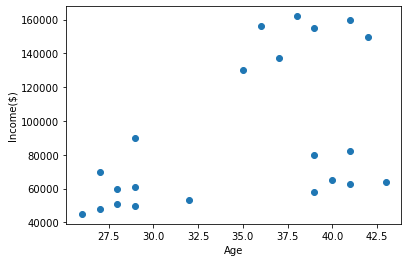

In [5]:
#  practical of K means
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("C:\\Users\\Sana\\Downloads\\income.csv")
print("*********Training data*********")
print(df.head())
print("\n")

plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()



Predicted values of cluster:  [0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]
*********Training dataset with clusters*********
      Name  Age  Income($)  cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1
Centroids are : [[3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]]


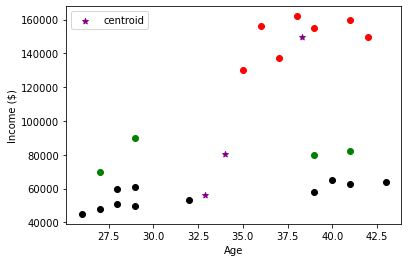

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print("Predicted values of cluster: ",y_predicted)

df['cluster']=y_predicted
print("*********Training dataset with clusters*********")
print(df.head())

print("Centroids are :",km.cluster_centers_)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()



*********Training dataset with clusters*********
      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0
Predicted clusters:  [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]
*********Testing dataset with clusters*********
      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0


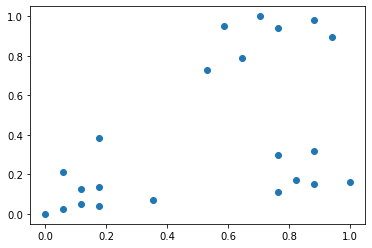

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

print("*********Training dataset with clusters*********")
print(df.head())

print(plt.scatter(df.Age,df['Income($)']))

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print("Predicted clusters: ",y_predicted)

df['cluster']=y_predicted
print("*********Testing dataset with clusters*********")
print(df.head())




Centroids are: [[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


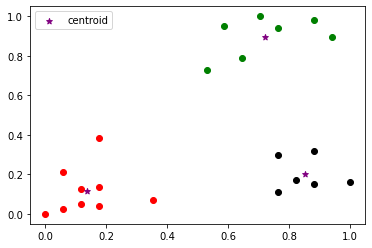

C:\Users\Sana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


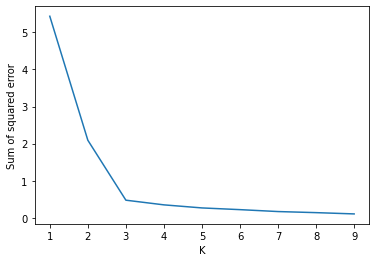

In [9]:
print("Centroids are:",km.cluster_centers_)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

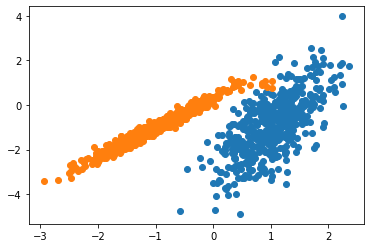

In [8]:
# 15 dwdm birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)

for cluster in clusters:

	row_ix = where(yhat == cluster)

	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [1]:
pip install sklearn.datasets.samples_generator

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.datasets.samples_generator (from versions: none)
ERROR: No matching distribution found for sklearn.datasets.samples_generator


In [1]:

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
  
# Generating 600 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)
  
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
  
# Fit the data (Training)
model.fit(dataset)
  
# Predict the same data
pred = model.predict(dataset)
  
# Creating a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:
from pyclustering.cluster import cluster_visualizer,cluster_visualizer_multidim
from pyclustering.cluster.rock import rock;
from pyclustering.utils import read_sample;
from random import random;
data = [ [random()] for i in range(10) ] + [ [random() + 3] for i in range(10) ] + [ [random() + 5] for i in range(10) ] + [ [random() + 8] for i in range(10) ]
print(data)
rock_instance = rock(data, 1, 4, 0.5);
rock_instance.process();
clusters = rock_instance.get_clusters();
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show();
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
data = read_sample(FCPS_SAMPLES.SAMPLE_HEPTA)
# Create an instance of the ROCK algorithm for cluster analysis. Seven clusters should be allocated.
rock = rock(data, 1.0, 7)
 # Run cluster analysis.
rock.process()
# Obtain results of clustering.
clusters = rock.get_clusters()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show();

In [10]:
from pyclustering.cluster import cluster_visualizer,cluster_visualizer_multidim
from pyclustering.cluster.rock import rock;
from pyclustering.utils import read_sample;
from random import random;
data = [ [random()] for i in range(10) ] + [ [random() + 3] for i in range(10) ] + [ [random() + 5] for i in range(10) ] + [ [random() + 8] for i in range(10) ]
print(data)

[[0.8224626103045324], [0.3315185834291454], [0.7372975111829929], [0.3274420232143562], [0.37705928405534317], [0.6171526282087332], [0.2479557314086036], [0.44822812040810034], [0.042731009679035536], [0.6426136819473721], [3.7271055393564714], [3.927744178280806], [3.326599426236664], [3.800245195281734], [3.906985110256846], [3.279584820820747], [3.7408881854218263], [3.407813488722545], [3.710995555362665], [3.943214338006234], [5.597284428702407], [5.570557726853781], [5.150632334613259], [5.365099556266342], [5.598614951647419], [5.7929178776329415], [5.148819517641382], [5.833535919390376], [5.212146719402905], [5.924829073424702], [8.097835468480401], [8.450498034175332], [8.989501869184219], [8.036737201248158], [8.350632600930252], [8.139779474706044], [8.406020339980378], [8.362527592014347], [8.595195080057216], [8.79491400918948]]


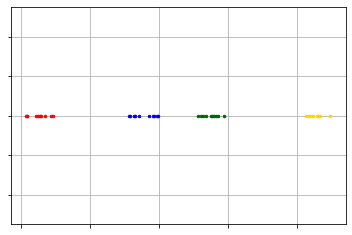

In [5]:
rock_instance = rock(data, 1, 4, 0.5);
rock_instance.process();
clusters = rock_instance.get_clusters();
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show();

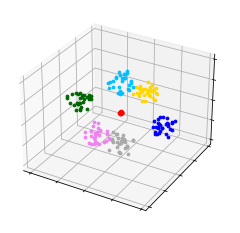

In [6]:
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
data = read_sample(FCPS_SAMPLES.SAMPLE_HEPTA)
# Create an instance of the ROCK algorithm for cluster analysis. Seven clusters should be allocated.
rock = rock(data, 1.0, 7)
 # Run cluster analysis.
rock.process()
# Obtain results of clustering.
clusters = rock.get_clusters()
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show();

In [ ]:
# 17th Apriori Algorithem

In [12]:
def Load_data():
    baskets_data = [
        ['rice', 'pulse', 'oil'],
        ['pulse', 'oil','milk'],
        ['milk', 'apple'],
        ['rice', 'pulse', 'milk'],
        ['rice', 'pulse', 'oil', 'apple'],
        ['rice', 'pulse', 'oil','milk', 'apple'],
       
    ]
    return baskets_data
def createC1(data):
    """
    Create a list of unique items in transaction data.
    Represent each item as a set of length 1.
    """
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    # create a set for each item in C1
    return [set(x) for x in C1]
def createCk(Lk, k):
    """
    Create a list of candidates of length k.
    
    Arguments:
       Lk: a list of frequent itemsets
       k: the size of the itemsets
    
    """
    cand_list = []
    len_Lk = len(Lk)
    
    # join sets if first k-2 items are equal
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    
    return cand_list
def scanD(data, Ck, min_support):
    """
    Scan through transaction data and return a list of candidates that meet
    the support threshold, and support data about the current candidates.
    
    Arguments:
       data: data set,
       Ck: a list of candidate sets
       min_support: the minimum support
    """
    count = {}
    for transaction in data:
        tr = set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can = frozenset(candidate)
                if can not in count:
                    count[can] = 1
                else:
                    count[can] += 1
                    num_items = float(len(D))
    
    cand_list = []
    support_data = {}
    
    # calculate support for every itemset
    for key in count:
        support = count[key]/num_items
        
        # If the support meets the minimum support requirements, 
        # add it to the list of itemsets.
        if support >= min_support:
            cand_list.insert(0, key)
        support_data[key] = support
    
    return cand_list, support_data
min_support = 0.5
data = Load_data()
print(" Input Data Is :\n",data)
C1 = createC1(data)
print(" \nCreated list by acending order :\n",C1)
D = list(map(set, data))
L1, support_data1 = scanD(D, C1, min_support)
print(" \nFrozenSet List:\n")
L1


 Input Data Is :
 [['rice', 'pulse', 'oil'], ['pulse', 'oil', 'milk'], ['milk', 'apple'], ['rice', 'pulse', 'milk'], ['rice', 'pulse', 'oil', 'apple'], ['rice', 'pulse', 'oil', 'milk', 'apple']]
 
Created list by acending order :
 [{'apple'}, {'milk'}, {'oil'}, {'pulse'}, {'rice'}]
 
FrozenSet List:



[frozenset({'apple'}),
 frozenset({'milk'}),
 frozenset({'rice'}),
 frozenset({'pulse'}),
 frozenset({'oil'})]

In [29]:
print(" Support: ")
support_data1

 Support: 


{frozenset({'oil'}): 0.6666666666666666,
 frozenset({'pulse'}): 0.8333333333333334,
 frozenset({'rice'}): 0.6666666666666666,
 frozenset({'milk'}): 0.6666666666666666,
 frozenset({'apple'}): 0.5}

In [34]:
C2 = createCk(L1, k=2)
print("Create Pair Of product:");
C2


Create Pair Of product:


[frozenset({'apple', 'milk'}),
 frozenset({'apple', 'rice'}),
 frozenset({'apple', 'pulse'}),
 frozenset({'apple', 'oil'}),
 frozenset({'milk', 'rice'}),
 frozenset({'milk', 'pulse'}),
 frozenset({'milk', 'oil'}),
 frozenset({'pulse', 'rice'}),
 frozenset({'oil', 'rice'}),
 frozenset({'oil', 'pulse'})]

In [35]:
L2, support_data2 = scanD(D, C2, min_support)
print(" \nFrozenSet List:\n")
L2

 
FrozenSet List:



[frozenset({'milk', 'pulse'}),
 frozenset({'oil', 'pulse'}),
 frozenset({'oil', 'rice'}),
 frozenset({'pulse', 'rice'})]

In [36]:

print(" Support: ")
support_data2

 Support: 


{frozenset({'pulse', 'rice'}): 0.6666666666666666,
 frozenset({'oil', 'rice'}): 0.5,
 frozenset({'oil', 'pulse'}): 0.6666666666666666,
 frozenset({'milk', 'pulse'}): 0.5,
 frozenset({'milk', 'oil'}): 0.3333333333333333,
 frozenset({'apple', 'milk'}): 0.3333333333333333,
 frozenset({'milk', 'rice'}): 0.3333333333333333,
 frozenset({'apple', 'rice'}): 0.3333333333333333,
 frozenset({'apple', 'pulse'}): 0.3333333333333333,
 frozenset({'apple', 'oil'}): 0.3333333333333333}

In [37]:
C3 = createCk(L2, k=3)
print("Create Pair Of product:");
C3



Create Pair Of product:


[frozenset({'oil', 'pulse', 'rice'})]

In [38]:
print(" \nFrozenSet List:\n")
L3, support_data3 = scanD(D, C3, min_support)
L3

 
FrozenSet List:



[frozenset({'oil', 'pulse', 'rice'})]

In [39]:
print(" Support: ")
support_data3

 Support: 


{frozenset({'oil', 'pulse', 'rice'}): 0.5}